# Fitting to a negative binomial distribution
-----

This is a harder challenge than fitting to normal data. A negative binomial distribution is discrete and heavy tailed, wheras a normal distribution is continuous and short-tailed. It may be necessary to transform the data before doing model fitting e.g. $y = \log(x)$.

In [40]:
%pylab inline
import sys
sys.path.append('../')

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## load libraries

In [41]:
import importlib
import pydra
import gen_data_utils as gd
import plot_utils as pu
import scipy.stats as stats
from tqdm import tqdm

importlib.reload(pydra)
importlib.reload(gd)
importlib.reload(pu)

<module 'plot_utils' from '../plot_utils.py'>

## Set plotting parameters

In [42]:
import seaborn as sns
import matplotlib

sns.set_style("whitegrid",{"xtick.major.size": 8, "ytick.major.size": 8})
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('figure',**{'figsize'   : (6.4, 4.8)})
matplotlib.rc('font', **font)

## Generate negative binomial data

In [43]:
def nbin_data(m,k,data_n=1000):
    p = k/(m+k)
    n = k
    return stats.nbinom(n,p).rvs(data_n)

In [44]:
xs = nbin_data(5.,2.)
np.mean(xs)

4.928

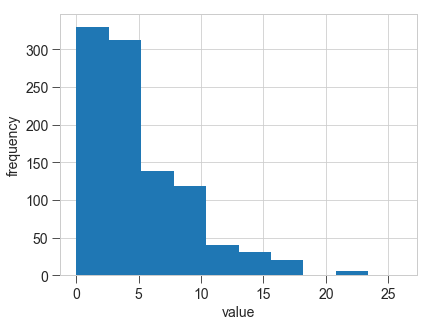

In [45]:
fig = plt.figure()
plt.hist(xs);
plt.xlabel('value');
plt.ylabel('frequency');

In [47]:
size = 10000
m = np.random.uniform(high=100.,low=0.1,size=size)
k = np.random.uniform(high=5.,low=0.01,size=size)

# add an epsilon term as values aren't allowed to be exactly zero.
y = nbin_data(m,k,data_n=size) +1e-10

## Plot test data

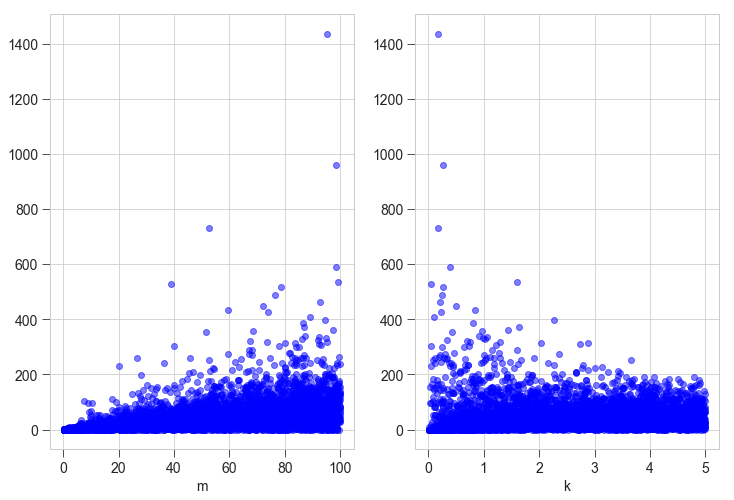

In [48]:
plt.figure(figsize=(12,8));
xs = [m,k]
x_label = ['m','k']

for i,(x,label) in enumerate(zip(xs,x_label)):
    plt.subplot(1,2,i+1);
    plt.plot(x,y,'bo',alpha=0.5);plt.xlabel(label);

## Load emulation model

In [22]:
model = pydra.Pydra(cluster_size=20,output_size=1,layers=3,input_size=2,
                       dense_layer_size=64,output_distributions=['Gamma'],print_summary=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 64)           192         input_2[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 64)           4160        dense_7[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 64)           4160        dense_8[0][0]                    
__________________________________________________________________________________________________
dense_10 (

In [23]:
def shape_for_mdn(x):
    return x.reshape(x.size,1)
m = shape_for_mdn(m)
k = shape_for_mdn(k)
y = shape_for_mdn(y)
data = np.hstack((m,k))

In [24]:
print(data.shape)
print(y.shape)

(10000, 2)
(10000, 1)


In [25]:
history = model.fit(data, y, epochs=100, batch_size=50,
          verbose=1)

../error_check.py:33: UserWarning: 0.0534% of values for output None below 0.001. As using the Gamma distribution for this output, this may lead to nans in training.
  format(np.mean(output<eps),i,eps,distribution)


Epoch 1/100
10000/10000 [==============================] - 1s 91us/step - loss: 4.1297
Epoch 2/100
10000/10000 [==============================] - 0s 41us/step - loss: 3.6158
Epoch 3/100
10000/10000 [==============================] - 0s 43us/step - loss: 3.5650
Epoch 4/100
10000/10000 [==============================] - 0s 40us/step - loss: 3.4962
Epoch 5/100
10000/10000 [==============================] - 0s 40us/step - loss: 3.4566
Epoch 6/100
10000/10000 [==============================] - 0s 42us/step - loss: 3.4067
Epoch 7/100
10000/10000 [==============================] - 0s 40us/step - loss: 3.3713
Epoch 8/100
10000/10000 [==============================] - 0s 42us/step - loss: 3.3498
Epoch 9/100
10000/10000 [==============================] - 0s 41us/step - loss: 3.3305
Epoch 10/100
10000/10000 [==============================] - 0s 40us/step - loss: 3.3196
Epoch 11/100
10000/10000 [==============================] - 0s 44us/step - loss: 3.3115
Epoch 12/100
10000/10000 [===============

10000/10000 [==============================] - 1s 50us/step - loss: 3.2086
Epoch 95/100
10000/10000 [==============================] - 1s 57us/step - loss: 3.1770
Epoch 96/100
10000/10000 [==============================] - 1s 51us/step - loss: 3.1854
Epoch 97/100
10000/10000 [==============================] - 1s 54us/step - loss: 3.1763
Epoch 98/100
10000/10000 [==============================] - 0s 43us/step - loss: 3.1752
Epoch 99/100
10000/10000 [==============================] - 0s 49us/step - loss: 3.2276
Epoch 100/100
10000/10000 [==============================] - 1s 54us/step - loss: 3.1856


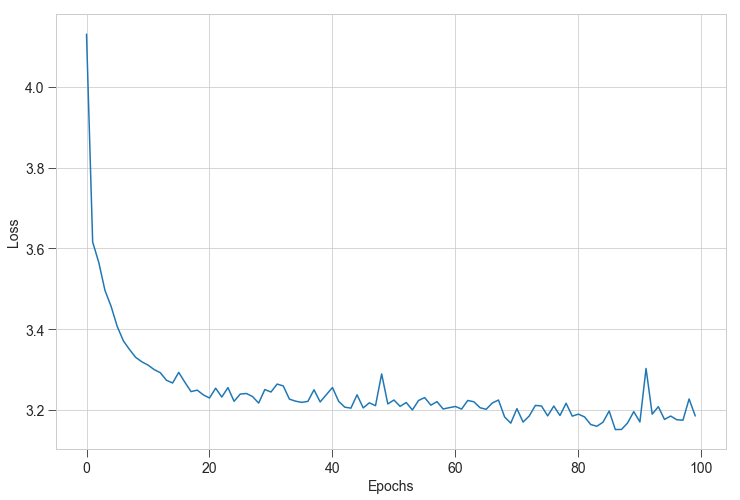

In [26]:
plt.figure(figsize=(12,8));
plt.plot(history.history['loss']);
plt.xlabel('Epochs'); plt.ylabel('Loss');

## Sample from m and k to compare samples from fitted MDN model to data

In [27]:
m_test = np.random.uniform(high=100.,low=0.1,size=size)
k_test = np.random.uniform(high=5.,low=0.01,size=size)
y_test = nbin_data(m_test,k_test,data_n=size)
m_test = shape_for_mdn(m_test)
k_test = shape_for_mdn(k_test)
y_test = shape_for_mdn(y_test)
x_test = np.hstack((m_test,k_test))

# get y-predictions.
y_pred = model.generate_mdn_sample_from_ouput(x_test)


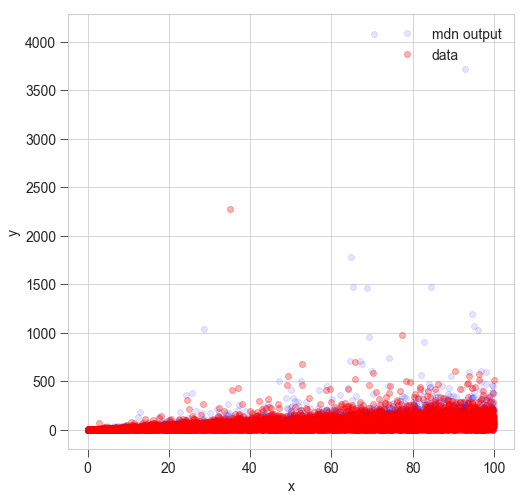

In [28]:
plt.figure(figsize=(8, 8))
plt.plot(m_test,y_pred,'bo',alpha=0.1,label='mdn output')
plt.plot(m_test,y_test,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');

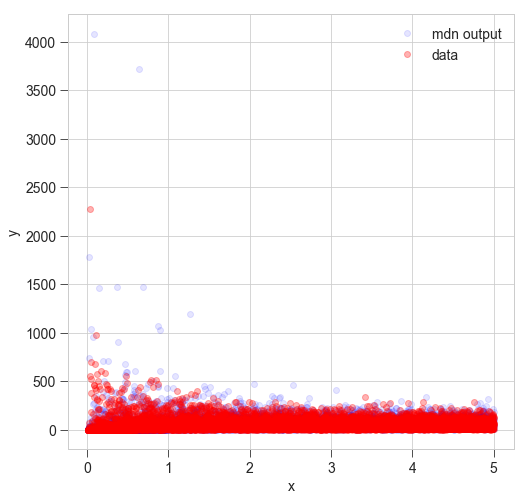

In [29]:
plt.figure(figsize=(8, 8))
plt.plot(k_test,y_pred,'bo',alpha=0.1,label='mdn output')
plt.plot(k_test,y_test,'ro',alpha=0.3,label='data')
plt.legend();plt.xlabel('x');plt.ylabel('y');

## Plot across a given axis

In [30]:
k = 4.
m_test = np.linspace(0.1,100.,num=1000)
k_test = k*np.ones(m_test.shape)

m_test = shape_for_mdn(m_test)
k_test = shape_for_mdn(k_test)

x_test = np.hstack((m_test,k_test))

output = model.predict(x_test)

In [31]:
def nbinom_var(m,k):
    return m*(1.+m/k)

## plot using plot_utils library

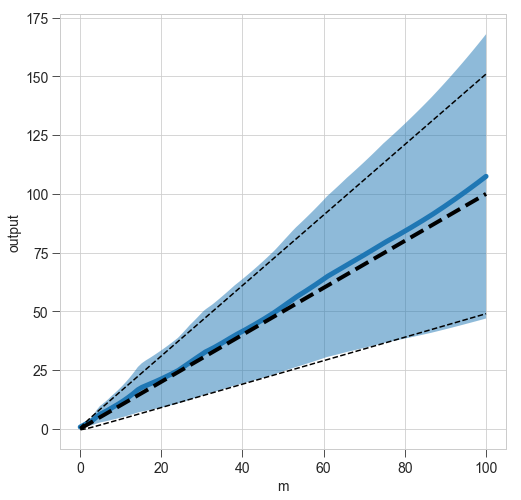

In [32]:
pu.plot_mean_and_var(output,m_test,distribution=['Gamma'])
v = nbinom_var(m_test.flatten(),k)
plt.xlabel('m');
plt.ylabel('output');
plt.title('');
plt.plot(m_test.flatten(),m_test.flatten(),'k--',lw=4.);
plt.plot(m_test.flatten(),m_test.flatten()+np.sqrt(v),'k--');
plt.plot(m_test.flatten(),m_test.flatten()-np.sqrt(v),'k--');
plt.savefig('./figs/nbinom_test_m.pdf');

## plot directly from Pydra class (this includes the prediction step)

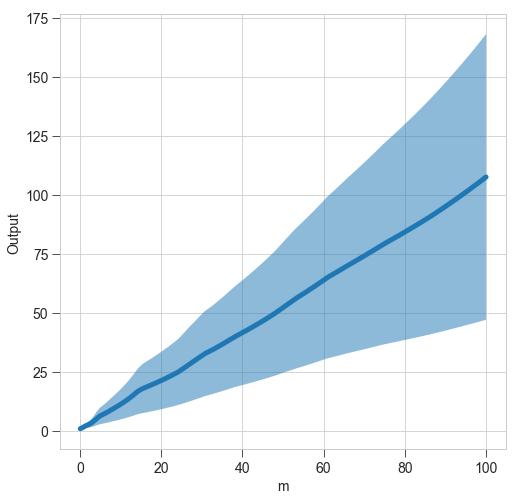

In [33]:
model.predict_plot(x_test,axis=0)
plt.xlabel('m');
plt.title('');
plt.ylabel('Output');

In [34]:
m_test = 50.*np.ones(m_test.shape)
k_test = np.linspace(0.01,5.,num=1000)

m_test = shape_for_mdn(m_test)
k_test = shape_for_mdn(k_test)

x_test = np.hstack((m_test,k_test))

output = model.predict(x_test)

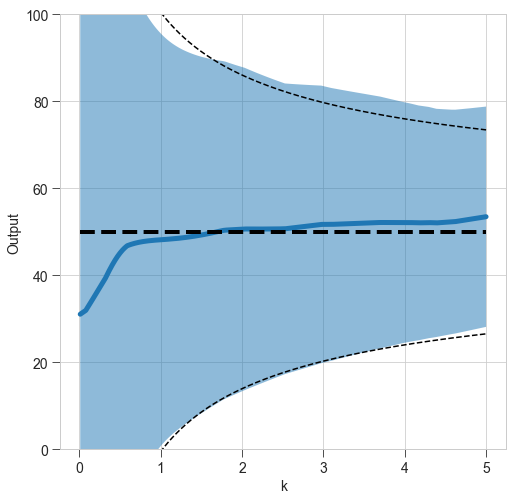

In [35]:
pu.plot_mean_and_var(output,k_test,distribution=['Gamma'])
v = nbinom_var(m_test.flatten(),k_test.flatten())
plt.plot(k_test.flatten(),m_test.flatten(),'k--',lw=4.);
plt.plot(k_test.flatten(),m_test.flatten()+np.sqrt(v),'k--');
plt.plot(k_test.flatten(),m_test.flatten()-np.sqrt(v),'k--');
plt.xlabel('k');
plt.title('');
plt.ylim(0.,100.);
plt.ylabel('Output');
plt.savefig('./figs/nbinom_test_k.pdf');

# compare distributions from MDN-generated data to true generating process

In [36]:
from scipy.stats import ks_2samp

def ks_test_over_x(x,k=4.):
    m_test = x*np.ones(100)
    k_test = k*np.ones(m_test.shape)

    m_test = shape_for_mdn(m_test)
    k_test = shape_for_mdn(k_test)

    x_test = np.hstack((m_test,k_test))
    
    y_test = model.generate_mdn_sample_from_ouput(x_test)
    y_original = nbin_data(m_test,k_test,data_n=None) + 1e-10;
    res = ks_2samp(y_test.flatten(),y_original.flatten())
    return res.statistic

In [37]:
def ks_test_over_linspace(n=100,k=4.):
    xinput = np.linspace(0.,100.,num=n)
    pvals = np.zeros(n)
    for i in range(pvals.size):
        x = xinput[i]
        pvals[i] = ks_test_over_x(x,k=k)
    return xinput,pvals

In [38]:
reps = 200
n=100
Xinput = np.zeros((reps,n))
Pval = np.zeros((reps,n))
for i in tqdm(range(reps)):
    
    xinput,pvals = ks_test_over_linspace()
    Xinput[i,:] = xinput
    Pval[i,:] = pvals

100%|██████████| 200/200 [03:41<00:00,  1.13s/it]


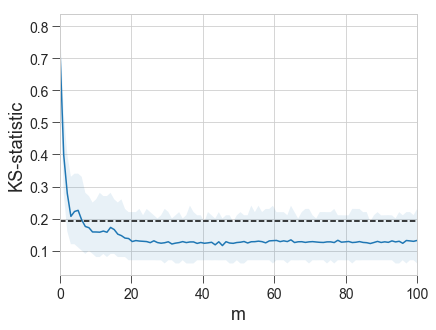

In [39]:
pmean = np.mean(Pval,axis=0)
lc,uc = np.percentile(Pval,[2.5,97.5],axis=0)
plt.plot(xinput,pmean);
plt.fill_between(xinput,lc,uc,alpha=0.1);
plt.xlabel('m',fontsize=18);
plt.ylabel('KS-statistic',fontsize=18);
plt.plot([0,100.],np.sqrt(2*n/(n*n))*np.array([1.35810,1.35810]),'k--');
plt.xlim(0.,100.);
plt.savefig('./figs/nbinom_test_KS_statistic.pdf');

In [165]:
m,k = 50.,2.5
m_test = m*np.ones(100)
k_test = k*np.ones(m_test.shape)

m_test = shape_for_mdn(m_test)
k_test = shape_for_mdn(k_test)

x_test = np.hstack((m_test,k_test))

y_test = model.generate_mdn_sample_from_ouput(x_test)
y_original = nbin_data(m,k,data_n=100000) + 1e-10;

100%|██████████| 1000/1000 [00:12<00:00, 80.75it/s]


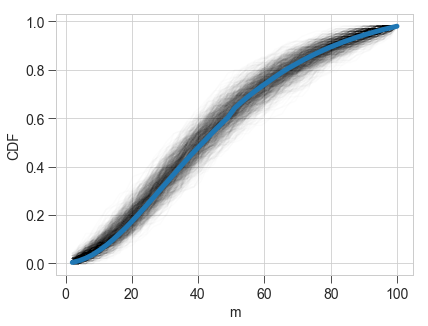

In [170]:
bins = np.linspace(0,100);
plt.figure();
for i in tqdm(range(1000)):
    y_test = model.generate_mdn_sample_from_ouput(x_test)
    hist, bin_edges = np.histogram(y_test, normed=True,bins=bins)
    cdf_test = np.cumsum(hist)
    plt.plot(bins[1:],2.*cdf_test,'k-',alpha=0.01);


hist, bin_edges = np.histogram(y_original, normed=True,bins=bins)
cdf_original = np.cumsum(hist)
plt.plot(bins[1:],2.*cdf_original,label = 'original',lw=5.);

plt.xlabel('m');
plt.ylabel('CDF');
plt.legend([]);
plt.savefig('./figs/nbinom_test_cdf.pdf');